<a href="https://colab.research.google.com/github/infizest/BM9717-Data-Management-and-Visualization/blob/main/BM9717_Data_Management_and_Visualization_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# data management and visualization skills by using R.

# Load required libraries

In [22]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [23]:
library(readr)
library(ggplot2)
library(dplyr)
library(corrplot)
library(caret)

# Step 1: Import Dataset

In [24]:
data_url <- "https://docs.google.com/spreadsheets/d/e/2PACX-1vSyApjLGxCbRCnuTeFhnbN1r3KFprc0o0bl6UuK8Z3fzfuy-VTVq246gXUXMdb0Ihxq3wMETPz63HzB/pub?output=csv"
data <- read_csv(data_url)

Rows: 270 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Step 2: Identify Insights

**Check structure of the dataset**

In [25]:
str(data)
summary(data)

spc_tbl_ [270 × 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ age     : num [1:270] 70 67 57 64 74 65 56 59 60 63 ...
 $ sex     : num [1:270] 1 0 1 1 0 1 1 1 1 0 ...
 $ cp      : num [1:270] 3 2 1 3 1 3 2 3 3 3 ...
 $ trestbps: num [1:270] 130 115 124 128 120 120 130 110 140 150 ...
 $ chol    : num [1:270] 322 564 261 263 269 177 256 239 293 407 ...
 $ fbs     : num [1:270] 0 0 0 0 0 0 1 0 0 0 ...
 $ restecg : num [1:270] 2 2 0 0 2 0 2 2 2 2 ...
 $ thalach : num [1:270] 109 160 141 105 121 140 142 142 170 154 ...
 $ exang   : num [1:270] 0 0 0 1 1 0 1 1 0 0 ...
 $ oldpeak : num [1:270] 2.4 1.6 0.3 0.2 0.2 0.4 0.6 1.2 1.2 4 ...
 $ slope   : num [1:270] 1 1 0 1 0 0 1 1 1 1 ...
 $ ca      : num [1:270] 3 0 0 1 1 0 1 1 2 3 ...
 $ thal    : num [1:270] 1 3 3 3 1 3 2 3 3 3 ...
 $ target  : num [1:270] 1 0 1 0 0 0 1 1 1 1 ...
 - attr(*, "spec")=
  .. cols(
  ..   age = col_double(),
  ..   sex = col_double(),
  ..   cp = col_double(),
  ..   trestbps = col_double(),
  ..   chol = col_doubl

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:2.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :2.000   Median :130.0  
 Mean   :54.43   Mean   :0.6778   Mean   :2.174   Mean   :131.3  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:3.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg         thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.000   Min.   : 71.0  
 1st Qu.:213.0   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:133.0  
 Median :245.0   Median :0.0000   Median :2.000   Median :153.5  
 Mean   :249.7   Mean   :0.1481   Mean   :1.022   Mean   :149.7  
 3rd Qu.:280.0   3rd Qu.:0.0000   3rd Qu.:2.000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.000   Max.   :202.0  
     exang           oldpeak         slope              ca        
 Min.   :

# Step 3: Data Exploration and Preparation

**Missing Values **

In [26]:
missing_values <- colSums(is.na(data))
print(missing_values)

     age      sex       cp trestbps     chol      fbs  restecg  thalach 
       0        0        0        0        0        0        0        0 
   exang  oldpeak    slope       ca     thal   target 
       0        0        0        0        0        0 


**Convert( categorical variables -> factors)**

In [27]:
data$sex <- as.factor(data$sex)
data$cp <- as.factor(data$cp)
data$fbs <- as.factor(data$fbs)
data$restecg <- as.factor(data$restecg)
data$exang <- as.factor(data$exang)
data$slope <- as.factor(data$slope)
data$ca <- as.factor(data$ca)
data$thal <- as.factor(data$thal)
data$target <- as.factor(data$target)

# Step 4: Data Manipulation

***Normalize continuous variables***

In [28]:
continuous_vars <- c("age", "trestbps", "chol", "thalach", "oldpeak")
data[continuous_vars] <- scale(data[continuous_vars])

# Step 5: Basic Exploratory Data Analysis

***continuous variables : Correlation matrix***

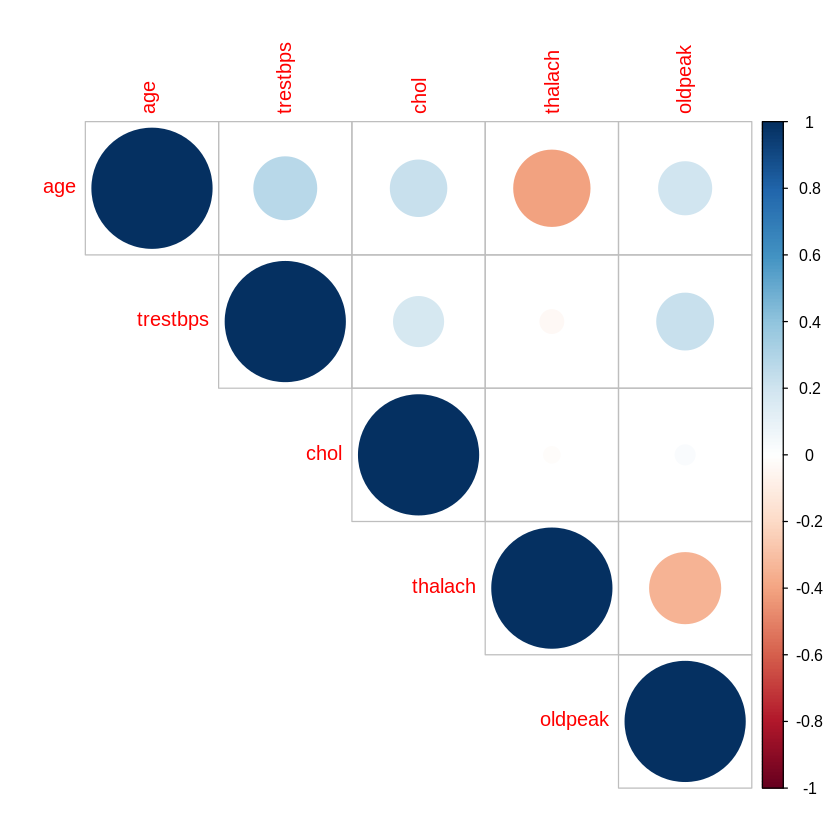

In [29]:
cor_matrix <- cor(data[continuous_vars])
corrplot(cor_matrix, method = "circle", type = "upper")

# Step 6: Visualization

**Age Distribution**

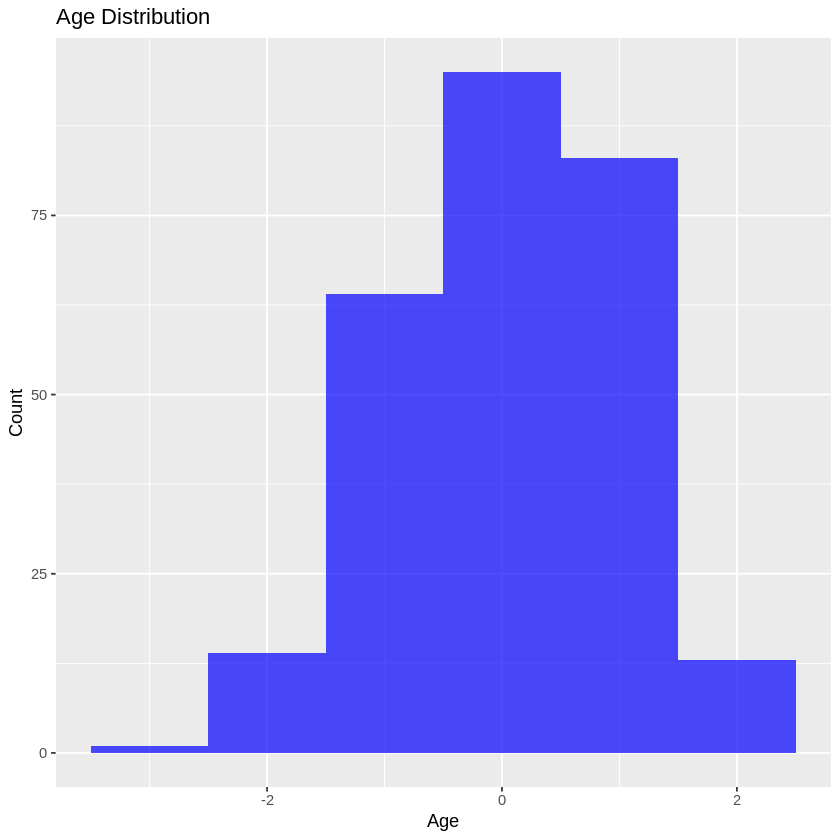

In [30]:
ggplot(data, aes(x = age)) +
  geom_histogram(binwidth = 1, fill = "blue", alpha = 0.7) +
  labs(title = "Age Distribution", x = "Age", y = "Count")

***Compaired : Chest Pain Type vs. Target***

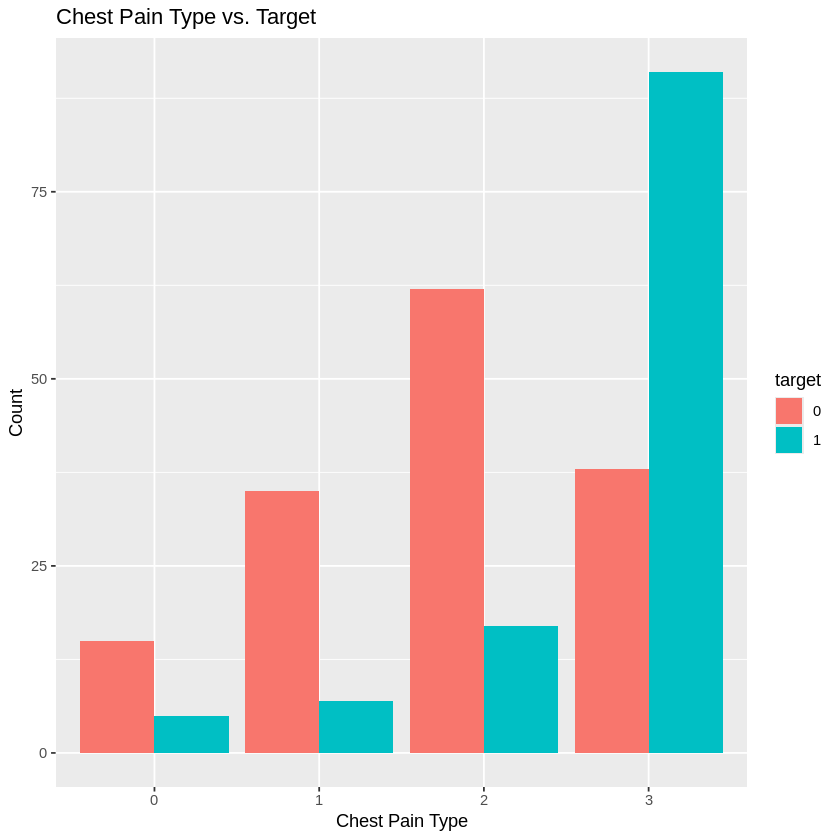

In [31]:
ggplot(data, aes(x = cp, fill = target)) +
  geom_bar(position = "dodge") +
  labs(title = "Chest Pain Type vs. Target", x = "Chest Pain Type", y = "Count")

# Step 7: Critical Evaluation

**key findings for healthcare decision-making**

In [32]:
key_summary <- data %>%
  group_by(target) %>%
  summarise(across(where(is.numeric), \(x) mean(x, na.rm = TRUE)))
print(key_summary)

# A tibble: 2 × 6
  target    age trestbps   chol thalach oldpeak
  <fct>   <dbl>    <dbl>  <dbl>   <dbl>   <dbl>
1 0      -0.190   -0.139 -0.105   0.374  -0.373
2 1       0.237    0.173  0.132  -0.467   0.466


In [33]:
colnames(data)


[1] "age"      "sex"      "cp"       "trestbps" "chol"     "fbs"     
 [7] "restecg"  "thalach"  "exang"    "oldpeak"  "slope"    "ca"      
[13] "thal"     "target"